In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd "/content/drive/My Drive/2022 - 2023/FALL 2022/Data Res"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/2022 - 2023/FALL 2022/Data Res
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/2022 - 2023/FALL 2022/Data Res


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("covid_data.csv")
res = []
for i in df["avg_spending_per_student"]:
  res.append(i.replace(",", ""))
df["avg_spending_per_student"] = res
df["avg_spending_per_student"] = df["avg_spending_per_student"].astype(float)

res = []
for i in df["avg_sat"]:
  res.append(i.replace(",", ""))
df["avg_sat"] = res
df["avg_sat"] = df["avg_sat"].astype(float)

In [ ]:
df['avg_spending_per_student'] = df['avg_spending_per_student'][:-3]

In [ ]:
df

,abbreviation,percen_college_degree,percen_some_college,percen_high_school_complete,tot_cases,pop,avg_sat,avg_spending_per_student,pop_over_tot_cases
0,AK,0.26,0.34,0.30,"105,682.86","4,779,736.00",1146.0,16576.0,45.23
1,AL,0.30,0.29,0.28,"648,385.13","710,231.00",1110.0,9636.0,1.10
2,AR,0.30,0.29,0.24,"410,054.86","6,392,017.00",1159.0,9976.0,15.59
3,AZ,0.24,0.29,0.34,"993,842.79","2,915,918.00",1191.0,8882.0,2.93
4,CA,0.35,0.25,0.20,"4,439,430.60","37,253,956.00",1115.0,11588.0,8.39
5,CO,0.42,0.27,0.21,"669,894.17","5,029,196.00",1021.0,10171.0,7.51
6,CT,0.40,0.16,0.26,"373,047.09","3,574,097.00",1025.0,17373.0,9.58
7,DC,0.33,0.30,0.31,"65,624.06","897,934.00",985.0,18069.0,13.68
8,DE,0.60,0.28,0.17,"125,562.96","601,723.00",987.0,14335.0,4.79
9,FL,0.31,0.32,0.28,"2,924,256.04","18,801,310.00",963.0,10098.0,6.43


Text(0.5, 0, 'Percent with only High School Diploma')

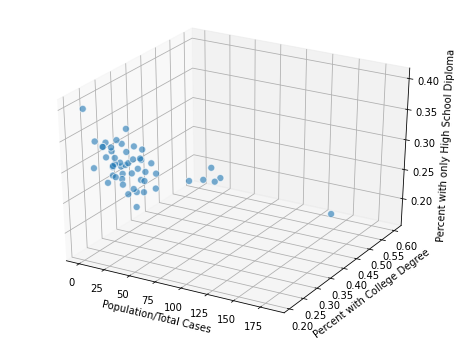

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['pop_over_tot_cases']
ys = df['percen_college_degree']
zs = df['percen_high_school_complete']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Population/Total Cases')
ax.set_ylabel('Percent with College Degree')
ax.set_zlabel('Percent with only High School Diploma')

y=127.154306x+(-24.730603)


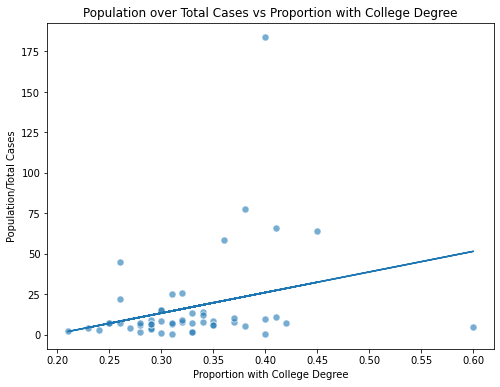

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ys = df['pop_over_tot_cases']
xs = df['percen_college_degree']
ax.scatter(xs, ys, s=50, alpha=0.6, edgecolors='w')
ax.set_ylabel('Population/Total Cases')
ax.set_xlabel('Proportion with College Degree')

z = np.polyfit(xs, ys, 1)
p = np.poly1d(z)
#add trendline to plot
plt.title("Population over Total Cases vs Proportion with College Degree")
plt.plot(xs, p(xs))
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

x = np.array(df['percen_college_degree'])
x = x.reshape(-1, 1)

model.fit(x, df['pop_over_tot_cases'])
model = LinearRegression().fit(x, df['pop_over_tot_cases'])
r_sq = model.score(x, df['pop_over_tot_cases'])
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.0804438785812247


In [ ]:
testing = np.arange(0, 100, 0.05, dtype = int).reshape(-1, 1)
y_pred = model.predict(testing)

In [ ]:
len(y_pred)

2000